### Библиотеки

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Параметры моделей

In [7]:
n_list_123 = [2, 4, 6] # 1,2,3 researches
l_list_123 = [20, 10, 10] # 1,2,3 researches

u_list_1 = ["1,2,3,4,5,6,7,8,9,10,11,12,13", "1,2,3,4,5,7,8,9,10,11", "1,2,3,4,5,7,8,9", "1,2,3,4,6"] # 1 research
u_list_23 = ["1,2,3,4,5,6,7,8,9,10,11,12,13", "1,2,3,4,5,6,7,8,9,10,11", "1,2,3,4,5,7,8,9", "1,2,3,4,5"] # 2 research

directories_123 = ["atonal_dl_hh", "hairy_at_dl_hh", "hairy_dl_hh"] # models (1,2,3 researches)

species_123 = ["melanogaster/", "simulans/"] # for 3rd research

test_h5_size_12 = 7668
train_h5_size_12 = 69015
final_h5_size_12 = 8500

test_h5_size_3_m = 3143
train_h5_size_3_m = 28289
final_h5_size_3_m = 3500

test_h5_size_3_s = 4525
train_h5_size_3_s = 40726
final_h5_size_3_s = 5000

### Графики

In [33]:
def plot_convergence_graps(directories, n_list, l_list, u_list, research_numb, df_sizes, species=[""], species_dir_name=""):
    for spec_ind, spec in enumerate(species):
        for dir_ind, direct in enumerate(directories):
            for ind, n in enumerate(n_list):
                for u in u_list:

                    fig, ax = plt.subplots(figsize=(12, 8))

                    ax.set_title("Графики зависимостей RMS от итерации\n" + direct + "\nn = " + str(n) + ", l = " + str(l_list[ind]) + "\nused functions = " + u, fontsize=14)

                    ax.set_xlabel("Iter", fontsize=14)        
                    ax.set_ylabel("Score", fontsize=14)

                    for k in range(1, 11):

                        scores = list()

                        deep_log = "../data/cluster_optimization/res_" + str(research_numb) + "/" + species_dir_name + spec + direct + "/train_block_" + str(k) + "_n_" + str(n) + "_l_" + str(l_list[ind]) + "_u_" + u + ".ini.log"

                        with open(deep_log, 'r') as log:
                            for line in log:
                                scores.append(float(line.split()[3][6:]) / np.sqrt(df_sizes[spec_ind]))

                        x = range(len(scores))

                        ax.semilogx(x, scores, label="k="+str(k), base=2)

                    ax.legend()

                    plt.grid(True)
                    filename = direct + "_n_" + str(n) + "_l_" + str(l_list[ind]) + "_u_" + u
                    plt.savefig("results/res_" + str(research_numb) + "/" + species_dir_name + spec + "/converg_graphs/" + filename + ".png")
                    plt.savefig("results/res_" + str(research_numb) + "/" + species_dir_name + spec + "/converg_graphs/" + filename + ".pdf")
                    plt.close()

In [34]:
plot_convergence_graps(directories_123, n_list_123, l_list_123, u_list_1, research_numb=1, df_sizes=[train_h5_size_12])

In [35]:
plot_convergence_graps(directories_123, n_list_123, l_list_123, u_list_23, research_numb=2, df_sizes=[train_h5_size_12])

In [36]:
plot_convergence_graps(directories_123, n_list_123, l_list_123, u_list_23, research_numb=3, df_sizes=[train_h5_size_3_m, train_h5_size_3_s], species=species_123, species_dir_name="byspecies/")

# Гистограммы

In [37]:
import seaborn as sns

import statistics as stat

from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon

In [38]:
def read_scores(directories, n_list, l_list, u_list, research_numb, df_sizes, species=[""], species_dir_name=""):
    
    rms_train_scores = dict()
    rms_test_scores = dict()

    for spec_ind, spec in enumerate(species):
        for dir_ind, direct in enumerate(directories):
            for u in u_list:
                for ind, n in enumerate(n_list):
                    for k in range(1, 11):
                        filedir_test = "../data/models/res_" + str(research_numb) + "/" + species_dir_name + spec + direct + "/test/nop1/"
                        filedir_train = "../data/models/res_" + str(research_numb) + "/" + species_dir_name + spec + direct + "/train/nop1/"

                        filename = "n_" + str(n) + "_l_" + str(l_list[ind]) + "_u_" + u + "_block_" + str(k)

                        with open(filedir_test+filename+".txt", 'r') as f:
                            data = f.readlines()
                            rms_test_scores[spec[:-1]+direct+"_"+filename] = float(data[0][7:]) / np.sqrt(df_sizes[spec_ind][0])

                        with open(filedir_train+filename+".txt", 'r') as f:
                            data = f.readlines()
                            rms_train_scores[spec[:-1]+direct+"_"+filename] = float(data[0][7:]) / np.sqrt(df_sizes[spec_ind][1])
                            
    return rms_train_scores, rms_test_scores

In [100]:
def plot_rms_hists(directories, n_list, l_list, u_list, research_numb, df_sizes, species=[""], species_dir_name=""):

    rms_train_scores, rms_test_scores = read_scores(directories, n_list, l_list, u_list, research_numb, df_sizes, species, species_dir_name)
    
    for spec_ind, spec in enumerate(species):
        for direct in directories:
            for u in u_list:

                part_rms_train_scores = dict()
                part_rms_test_scores = dict()

                for ind, n in enumerate(n_list):
                    for k in range(1, 11):
                        name = "n_" + str(n) + "_l_" + str(l_list[ind]) + "_u_" + u + "_block_" + str(k)
                        part_rms_train_scores[spec[:-1]+direct+"_"+name] = rms_train_scores[spec[:-1]+direct+"_"+name]
                        part_rms_test_scores[spec[:-1]+direct+"_"+name] = rms_test_scores[spec[:-1]+direct+"_"+name]

                sorted_part_rms_train_scores = {k: v for k, v in sorted(part_rms_train_scores.items(), key=lambda item: item[1])}
                sorted_part_rms_test_scores = {k: v for k, v in sorted(part_rms_test_scores.items(), key=lambda item: item[1])}

                fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))

                fig.suptitle("Histograms of train and test rms")

                axes[0].set_title("Train rms")
                axes[1].set_title("Test rms")

                sns.histplot(list(part_rms_train_scores.values()), ax=axes[0], bins=30, common_norm=True)
                sns.histplot(list(part_rms_test_scores.values()), ax=axes[1], bins=30, common_norm=True)
                
                train_median = stat.median_low(part_rms_train_scores.values())
                test_median = stat.median_low(part_rms_test_scores.values())
                
                axes[0].axvline(train_median, color='r', linewidth=3, label="median = %.3f" % train_median)
                axes[1].axvline(test_median, color='y', linewidth=3, label="median = %.3f" % test_median)
                
                axes[0].legend()
                axes[1].legend()
                
                for ax in axes.flat:
                    ax.set_xlabel('RMS')

                filename = direct + "_u_" + u + "_scores_sep"
                
                plt.savefig("results/res_" + str(research_numb) + "/" + species_dir_name + spec + "hist/" + filename + ".png")
                plt.savefig("results/res_" + str(research_numb) + "/" + species_dir_name + spec + "hist/" + filename + ".pdf")
                
                plt.close()

                m_stat, m_p = mannwhitneyu(list(part_rms_train_scores.values()), list(part_rms_test_scores.values()))
                w_stat, w_p = wilcoxon(list(part_rms_train_scores.values()), list(part_rms_test_scores.values()))

                fig, ax = plt.subplots(1, 1, figsize=(10,5))

                ax.hist(list(part_rms_train_scores.values()), alpha=1, bins=30, label="train rms")
                ax.hist(list(part_rms_test_scores.values()), alpha=0.7, bins=30, label="test rms")
                
                ax.axvline(train_median, color='r', linewidth=3, label="train median = %.3f" % train_median)
                ax.axvline(test_median, color='y', linewidth=3, label="test median = %.3f" % test_median)
                
                plt.xlabel("RMS")
                plt.ylabel("Count")
                
                model = (list(sorted_part_rms_test_scores)[0])[len(spec[:-1]+direct)+1:]
                
                filedir_r = "../data/models/res_" + str(research_numb) + "/" + species_dir_name + spec + direct + "/test/p1/"
                filedir_w = "../data/best_models/res_" + str(research_numb) + "/" + species_dir_name + spec + direct + "/"
                
                with open(filedir_r+model+'.txt', 'r') as readfile:
                    data = readfile.readlines()
                
                with open(filedir_w+model+'.txt', 'w') as writefile:
                    writefile.write(''.join(data))
                
                best_model = "\nBest model: " + (list(sorted_part_rms_test_scores)[0])[len(spec[:-1]+direct)+1:] + ", rms = %.3f" % sorted_part_rms_test_scores[list(sorted_part_rms_test_scores)[0]]
                #ax.set_title(("Mann-Whitney rank test: stat=%.3f, p=%.3f\nWilcoxon signed-rank test: stat=%.3f, p=%.3f" + best_model) % (m_stat, m_p, w_stat, w_p), fontsize=10)
                ax.set_title((direct + "\nWilcoxon signed-rank test: stat=%.3f, p=%.3f" + best_model) % (w_stat, w_p), fontsize=10)
                plt.legend(loc="best")

                filename = direct + "_u_" + u + "_scores_tog"
                
                plt.savefig("results/res_" + str(research_numb) + "/" + species_dir_name + spec + "hist/" + filename + ".png")
                plt.savefig("results/res_" + str(research_numb) + "/" + species_dir_name + spec + "hist/" + filename + ".pdf")
                
                plt.close()

In [101]:
plot_rms_hists(directories_123, n_list_123, l_list_123, u_list_1, research_numb=1, df_sizes=[[test_h5_size_12, train_h5_size_12]])

In [102]:
plot_rms_hists(directories_123, n_list_123, l_list_123, u_list_23, research_numb=2, df_sizes=[[test_h5_size_12, train_h5_size_12]])

In [103]:
plot_rms_hists(directories_123, n_list_123, l_list_123, u_list_23, research_numb=3, df_sizes=[[test_h5_size_3_m, train_h5_size_3_m], [test_h5_size_3_s, train_h5_size_3_s]], species=species_123, species_dir_name="byspecies/")

In [7]:
def plot_hists_by_func(directories, n_list, l_list, u_list, research_numb, df_sizes, species=[""], species_dir_name=""):
    
    fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10,5))
    fig.suptitle("Histograms of train and test rms for all three functions")

    fig_tog, ax_tog = plt.subplots(1, 1, figsize=(10,5))
    fig_tog.suptitle("Histograms of train and test rms for all three functions together")

    axes[0].set_title("Atonal(dl, hh)")
    axes[1].set_title("Hairy(at, dl, hh)")
    axes[2].set_title("Hairy(dl, hh)")

    rms_train_scores, rms_test_scores = read_scores(directories, n_list, l_list, u_list, research_numb, df_sizes, species, species_dir_name)
    
    for spec_ind, spec in enumerate(species):
        for dir_ind, direct in enumerate(directories):
            
            part_rms_train_scores = dict()
            part_rms_test_scores = dict()

            for u in u_list:
                for ind, n in enumerate(n_list):
                    for k in range(1, 11):
                        name = "n_" + str(n) + "_l_" + str(l_list[ind]) + "_u_" + u + "_block_" + str(k)
                        part_rms_train_scores[spec[:-1]+direct+"_"+name] = rms_train_scores[spec[:-1]+direct+"_"+name]
                        part_rms_test_scores[spec[:-1]+direct+"_"+name] = rms_test_scores[spec[:-1]+direct+"_"+name]

            sorted_part_rms_train_scores = {k: v for k, v in sorted(part_rms_train_scores.items(), key=lambda item: item[1])}
            sorted_part_rms_test_scores = {k: v for k, v in sorted(part_rms_test_scores.items(), key=lambda item: item[1])}

            axes[dir_ind].hist(list(part_rms_train_scores.values()), alpha=1, bins=30, label="train rms")
            axes[dir_ind].hist(list(part_rms_test_scores.values()), alpha=0.6, bins=30, label="test rms")

            axes[dir_ind].set_xlabel("RMS")

            axes[dir_ind].legend(loc="best")

            values = list(part_rms_train_scores.values())
            values.extend(list(part_rms_test_scores.values()))

            ax_tog.hist(values, alpha=1-(dir_ind)/10, bins=60, label=direct)


        axes[0].set_ylabel("Count")

        ax_tog.set_xlabel("RMS")
        ax_tog.set_ylabel("Count")
        ax_tog.legend(loc="best")     


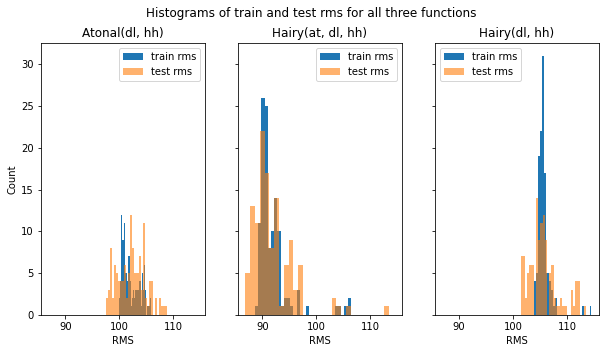

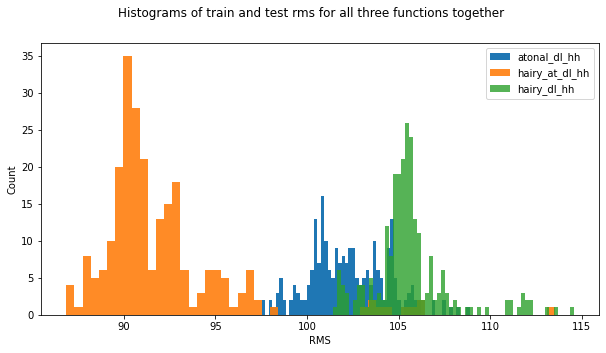

In [9]:
plot_hists_by_func(directories_123, n_list_123, l_list_123, u_list_23, research_numb=2, df_sizes=[[test_h5_size_12, train_h5_size_12]])

In [1]:
import glob, os

In [4]:
def count_r_sqr_adj(directories, n_list, l_list, u_list, research_numb, df_sizes, species=[""], species_dir_name=""):
    for spec_ind, spec in enumerate(species):
        for direct in directories:
            for u in u_list:
                
                filedir = "../data/best_models/res_" + str(research_numb) + "/" + species_dir_name + spec + direct + "/"
                
                y_sum = 0
                ss_tot = 0
                
                for file in glob.glob(filedir + '*_' + u + '_*.txt'):
                    print(file)
                    with open(file, 'r') as read_file:
                        data = read_file.readlines()
                        for i in range(df_sizes[spec_ind]):
                            line_list = data[i].split(" ")
                            y_sum += float(line_list[1])
                        y_mean = y_sum / df_sizes[spec_ind]
                        for i in range(df_sizes[spec_ind]):
                            line_list = data[i].split(" ")
                            ss_tot += (float(line_list[1]) - float(y_mean))**2
                        ss_res = float(data[df_sizes[spec_ind]][7:])**2
                        
                        func = data[df_sizes[spec_ind]+4]
                        
                        param_numb = 0
                        
                        at_count = func.count('AT')
                        dl_count = func.count('DL')
                        hh_count = func.count('HH')
                        
                        if at_count != 0:
                            param_numb += 1
                        if dl_count != 0:
                            param_numb += 1
                        if hh_count != 0:
                            param_numb += 1
                        
                AIC = 2 * param_numb + df_sizes[spec_ind] * (math.log(2 * math.pi * ss_res / df_sizes[spec_ind]) + 1)        
                R_sqr_adj = 1 - (ss_res / (df_sizes[spec_ind] - param_numb)) / (ss_tot / (df_sizes[spec_ind] - 1))
                print("Rsqr = ", R_sqr_adj)
                print("AIC = ", AIC)

In [8]:
count_r_sqr_adj(directories_123, n_list_123, l_list_123, u_list_1, research_numb=1, df_sizes=[test_h5_size_12])

../data/best_models/res_1/atonal_dl_hh\n_6_l_10_u_1,2,3,4,5,6,7,8,9,10,11,12,13_block_6.txt
Rsqr =  0.2643773421549185
AIC =  92134.44117352641
../data/best_models/res_1/atonal_dl_hh\n_4_l_10_u_1,2,3,4,5,7,8,9,10,11_block_6.txt
Rsqr =  0.26345796985675085
AIC =  92144.01856355123
../data/best_models/res_1/atonal_dl_hh\n_4_l_10_u_1,2,3,4,5,7,8,9_block_2.txt
Rsqr =  0.31288991258256227
AIC =  92072.00616233033
../data/best_models/res_1/atonal_dl_hh\n_6_l_10_u_1,2,3,4,6_block_3.txt
Rsqr =  0.2854557174233453
AIC =  92218.22719299092
../data/best_models/res_1/hairy_at_dl_hh\n_6_l_10_u_1,2,3,4,5,6,7,8,9,10,11,12,13_block_8.txt
Rsqr =  0.3118541079313706
AIC =  90045.25273332912
../data/best_models/res_1/hairy_at_dl_hh\n_4_l_10_u_1,2,3,4,5,7,8,9,10,11_block_8.txt
Rsqr =  0.2982810677552036
AIC =  90194.02500715766
../data/best_models/res_1/hairy_at_dl_hh\n_6_l_10_u_1,2,3,4,5,7,8,9_block_8.txt
Rsqr =  0.29645081643365
AIC =  90213.99895363986
../data/best_models/res_1/hairy_at_dl_hh\n_2_l_20_

In [9]:
count_r_sqr_adj(directories_123, n_list_123, l_list_123, u_list_23, research_numb=2, df_sizes=[test_h5_size_12])

../data/best_models/res_2/atonal_dl_hh\n_6_l_10_u_1,2,3,4,5,6,7,8,9,10,11,12,13_block_2.txt
Rsqr =  0.3172968447926512
AIC =  92022.66735945945
../data/best_models/res_2/atonal_dl_hh\n_4_l_10_u_1,2,3,4,5,6,7,8,9,10,11_block_2.txt
Rsqr =  0.31878287883316203
AIC =  92005.95829848439
../data/best_models/res_2/atonal_dl_hh\n_6_l_10_u_1,2,3,4,5,7,8,9_block_2.txt
Rsqr =  0.31246045977470627
AIC =  92076.79726570906
../data/best_models/res_2/atonal_dl_hh\n_2_l_20_u_1,2,3,4,5_block_2.txt
Rsqr =  0.3117182158664714
AIC =  92085.07090813595
../data/best_models/res_2/hairy_at_dl_hh\n_2_l_20_u_1,2,3,4,5,6,7,8,9,10,11,12,13_block_8.txt
Rsqr =  0.2944550002553208
AIC =  90235.72060840308
../data/best_models/res_2/hairy_at_dl_hh\n_4_l_10_u_1,2,3,4,5,6,7,8,9,10,11_block_8.txt
Rsqr =  0.28962931629589517
AIC =  90288.98820797121
../data/best_models/res_2/hairy_at_dl_hh\n_4_l_10_u_1,2,3,4,5,7,8,9_block_4.txt
Rsqr =  0.31056037300534334
AIC =  90232.37876460304
../data/best_models/res_2/hairy_at_dl_hh\n

In [10]:
count_r_sqr_adj(directories_123, n_list_123, l_list_123, u_list_23, research_numb=3, df_sizes=[test_h5_size_3_m, test_h5_size_3_s], species=species_123, species_dir_name="byspecies/")

../data/best_models/res_3/byspecies/melanogaster/atonal_dl_hh\n_4_l_10_u_1,2,3,4,5,6,7,8,9,10,11,12,13_block_9.txt
Rsqr =  0.31547658346954044
AIC =  37977.89412798764
../data/best_models/res_3/byspecies/melanogaster/atonal_dl_hh\n_2_l_20_u_1,2,3,4,5,6,7,8,9,10,11_block_9.txt
Rsqr =  0.3110539573565275
AIC =  37998.13536716944
../data/best_models/res_3/byspecies/melanogaster/atonal_dl_hh\n_6_l_10_u_1,2,3,4,5,7,8,9_block_9.txt
Rsqr =  0.312955579630117
AIC =  37989.44809386102
../data/best_models/res_3/byspecies/melanogaster/atonal_dl_hh\n_2_l_20_u_1,2,3,4,5_block_9.txt
Rsqr =  0.31516201159486323
AIC =  37979.338157906896
../data/best_models/res_3/byspecies/melanogaster/hairy_at_dl_hh\n_6_l_10_u_1,2,3,4,5,6,7,8,9,10,11,12,13_block_2.txt
Rsqr =  0.3335224166274924
AIC =  37413.244269586925
../data/best_models/res_3/byspecies/melanogaster/hairy_at_dl_hh\n_6_l_10_u_1,2,3,4,5,6,7,8,9,10,11_block_2.txt
Rsqr =  0.33025407501668
AIC =  37428.619568860064
../data/best_models/res_3/byspecies/me